In [2]:
!pip install labelme tensorflow tensorflow-gpu opencv-python matplotlib albumentations


^C


In [2]:
import os
import time
import uuid#this hwlps us to create a unique identifer for the images 
import cv2

In [3]:
IMAGES_PATH=os.path.join('data','images')
number_images=30

In [4]:
cap=cv2.VideoCapture(0)
for imgnum in range(number_images):
    print('Collecting image {}'.format(imgnum))
    ret,frame=cap.read()
    imgname=os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
    cv2.imwrite(imgname,frame)
    cv2.imshow('frame',frame)
    time.sleep(0.5)

    if cv2.waitKey(0) & 0xFF ==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [39]:
!labelme

2024-04-02 15:21:37,104 [INFO   ] __init__:get_config:67- Loading config file from: C:\Users\Raghav Aggarwal\.labelmerc


In [40]:
import tensorflow as tf
import cv2
import json 
import numpy as np 
from matplotlib import pyplot as plt

In [41]:
images=tf.data.Dataset.list_files('data\\images\\*.jpg',shuffle=False)

In [42]:
images.as_numpy_iterator().next()

b'data\\images\\01e088ea-f020-11ee-a60f-e454e8285120.jpg'

In [43]:
def load_image(x):
    byte_img=tf.io.read_file(x)
    img=tf.io.decode_jpeg(byte_img)
    return img

In [44]:
images=images.map(load_image)

In [45]:
images.as_numpy_iterator().next()

array([[[135, 137, 136],
        [132, 136, 135],
        [129, 135, 133],
        ...,
        [117, 127, 128],
        [120, 125, 128],
        [121, 125, 128]],

       [[133, 135, 134],
        [131, 135, 134],
        [127, 136, 133],
        ...,
        [116, 126, 127],
        [117, 125, 127],
        [119, 124, 127]],

       [[131, 135, 134],
        [130, 136, 134],
        [127, 136, 133],
        ...,
        [115, 126, 128],
        [116, 126, 128],
        [117, 125, 128]],

       ...,

       [[145, 147, 144],
        [146, 148, 145],
        [145, 150, 146],
        ...,
        [ 59,  61,  40],
        [ 63,  56,  40],
        [ 68,  56,  42]],

       [[143, 147, 146],
        [143, 147, 146],
        [143, 148, 144],
        ...,
        [ 63,  62,  41],
        [ 68,  58,  48],
        [ 68,  53,  46]],

       [[141, 145, 144],
        [141, 145, 144],
        [141, 146, 142],
        ...,
        [ 66,  66,  42],
        [ 75,  62,  54],
        [ 72,  54,  52]]

In [46]:
images_generator=images.batch(4).as_numpy_iterator()

In [47]:
plot_images=images_generator.next()

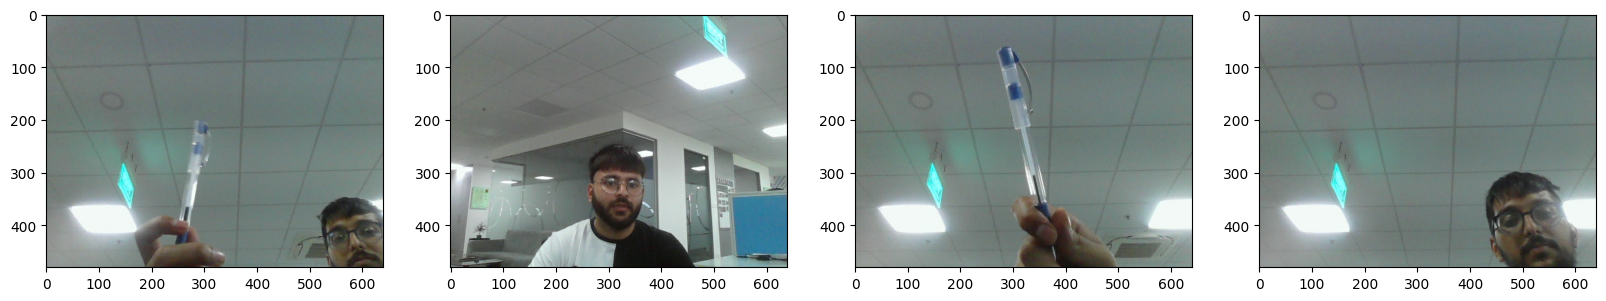

In [48]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,image in enumerate(plot_images):
    ax[idx].imshow(image)
plt.show()

In [49]:
for folder in ['train', 'test', 'val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file.split('.')[0] + '.json'
        existing_filepath = os.path.join('data', 'labels', filename)
        if os.path.exists(existing_filepath):
            new_filepath = os.path.join('data', folder, 'labels', filename)
            os.replace(existing_filepath, new_filepath)


In [50]:
import albumentations as alb

In [51]:
augmentor=alb.Compose([alb.RandomCrop(width=450,height=450),
                       alb.HorizontalFlip(p=0.45),
                       alb.RandomBrightnessContrast(p=0.2),
                       alb.RandomGamma(p=0.2),
                       alb.RGBShift(p=0.2),
                       alb.VerticalFlip(p=0.5)],
                       bbox_params=alb.BboxParams(format='albumentations',
                                                  label_fields=['class_labels']))

In [52]:
img = cv2.imread(os.path.join('data','train', 'images','1e44c06b-f000-11ee-8186-e454e8285120.jpg'))

In [53]:
img

array([[[157, 162, 147],
        [154, 159, 144],
        [151, 158, 145],
        ...,
        [ 22,  31,  40],
        [ 25,  33,  33],
        [ 25,  35,  29]],

       [[158, 162, 150],
        [155, 159, 147],
        [152, 159, 146],
        ...,
        [ 21,  32,  40],
        [ 23,  33,  33],
        [ 23,  34,  31]],

       [[157, 161, 150],
        [155, 159, 148],
        [154, 158, 147],
        ...,
        [ 18,  34,  41],
        [ 21,  34,  36],
        [ 20,  34,  32]],

       ...,

       [[210, 214, 202],
        [210, 214, 202],
        [211, 215, 203],
        ...,
        [144, 138, 119],
        [150, 142, 125],
        [154, 146, 129]],

       [[211, 216, 201],
        [211, 216, 201],
        [211, 216, 201],
        ...,
        [157, 157, 143],
        [154, 152, 141],
        [145, 143, 133]],

       [[211, 216, 201],
        [211, 216, 201],
        [212, 217, 202],
        ...,
        [185, 189, 178],
        [194, 195, 186],
        [182, 182, 176]]

In [54]:
with open(os.path.join('data', 'train', 'labels', '1e44c06b-f000-11ee-8186-e454e8285120.json'), 'r') as f:
    label = json.load(f)


In [55]:
label['shapes'][0]['points']

[[238.9655172413793, 1.2068965517241508],
 [387.2413793103448, 107.52873563218392]]

In [56]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [57]:
coords

[238.9655172413793, 1.2068965517241508, 387.2413793103448, 107.52873563218392]

In [58]:
coords = list(np.divide(coords, [640,480,640,480]))


In [59]:
coords

[0.37338362068965514,
 0.002514367816091981,
 0.6050646551724138,
 0.22401819923371652]

In [60]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])


In [61]:
augmented['bboxes'][0][2:]

(0.6738697318007663, 1.0)

In [62]:
augmented['bboxes']

[(0.344367816091954, 0.7810472541507024, 0.6738697318007663, 1.0)]

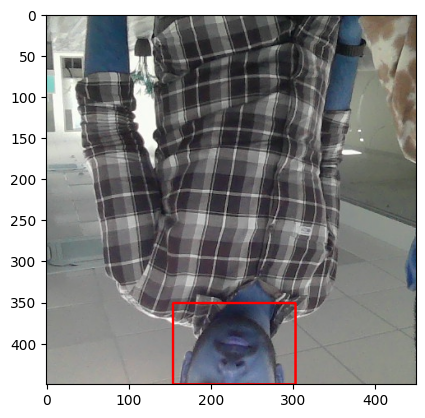

In [63]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

In [66]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(120):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)